<a href="https://colab.research.google.com/github/wonstop/DeepLearning/blob/master/20200401_emnist_keras_Ian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from mnist import MNIST
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop, Adam
from keras.models import load_model
from matplotlib.pyplot import imshow
from google.colab import files
from sklearn.model_selection import train_test_split
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

tbc=TensorBoardColab()

batch_size = 128
num_classes = 62
epochs = 10

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Wait for 8 seconds...
TensorBoard link:
http://d091d7c4.ngrok.io


In [ ]:
# pip install python-mnist  ##handle no module MNIST  

In [ ]:
# pip install tensorflow==1.14

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.python.compiler.tensorrt import trt_convert as trt




In [ ]:
# the data, split between train and test sets
 # Read all EMNIST test and train data
mndata = MNIST('/content/drive/My Drive/200g/gzip/')

x_train, y_train = mndata.load('/content/drive/My Drive/200g/gzip/emnist-byclass-train-images-idx3-ubyte', 
                               '/content/drive/My Drive/200g/gzip/emnist-byclass-train-labels-idx1-ubyte')
x_test, y_test = mndata.load('/content/drive/My Drive/200g/gzip/emnist-byclass-test-images-idx3-ubyte', 
                             '/content/drive/My Drive/200g/gzip/emnist-byclass-test-labels-idx1-ubyte')

#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


In [ ]:
    # Read mapping of the labels and convert ASCII values to chars
    mapping = []

    with open('/content/drive/My Drive/200g/gzip/emnist-byclass-mapping.txt') as f:
        for line in f:
            mapping.append(chr(int(line.split()[1])))

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)


In [ ]:
#Reshaping all images into 28*28 for pre-processing
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

<function matplotlib.pyplot.show>

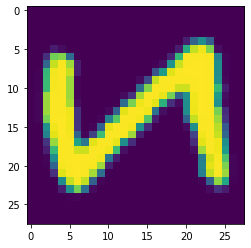

In [ ]:
#imshow(x_train[6])
#Display a random image
plt.imshow(x_train[0])
plt.show

In [ ]:
#Reshaping train and test data again for input into model
x_train = x_train.reshape(x_train.shape[0], 784,1)
x_test = x_test.reshape(x_test.shape[0], 784,1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


697932 train samples
116323 test samples


In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from keras.utils import np_utils

train_images = x_train
test_images = x_test

train_images = resh(train_images)
test_images = resh(test_images)

train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)


K.set_learning_phase(1)


# **Build Model**

In [ ]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(62, activation='softmax'))


opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_64 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_65 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_66 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_67 (Dense)             (None, 62)                7998      
Total params: 508,606
Trainable params: 508,606
Non-trainable params: 0
_________________________________________________________________


In [ ]:

test_images.shape

(116323, 784)

In [ ]:
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=batch_size, epochs=epochs, verbose=1)

Train on 697932 samples, validate on 116323 samples
Epoch 1/10
697932/697932 [==============================] - 79s 114us/step - loss: 0.6424 - acc: 0.7930 - val_loss: 0.4837 - val_acc: 0.8329
Epoch 2/10
697932/697932 [==============================] - 77s 110us/step - loss: 0.4577 - acc: 0.8390 - val_loss: 0.4629 - val_acc: 0.8368
Epoch 3/10
697932/697932 [==============================] - 77s 110us/step - loss: 0.4194 - acc: 0.8491 - val_loss: 0.4278 - val_acc: 0.8455
Epoch 4/10
697932/697932 [==============================] - 78s 111us/step - loss: 0.3978 - acc: 0.8548 - val_loss: 0.4120 - val_acc: 0.8509
Epoch 5/10
697932/697932 [==============================] - 78s 111us/step - loss: 0.3815 - acc: 0.8593 - val_loss: 0.4114 - val_acc: 0.8515
Epoch 6/10
697932/697932 [==============================] - 77s 111us/step - loss: 0.3694 - acc: 0.8623 - val_loss: 0.4174 - val_acc: 0.8500
Epoch 7/10
697932/697932 [==============================] - 78s 111us/step - loss: 0.3592 - acc: 0.865

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()


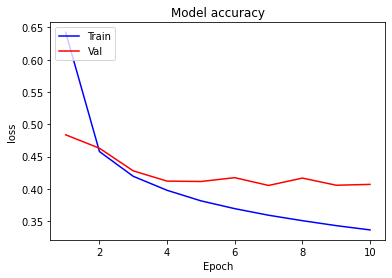

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

# Accuracy curve
plotgraph(epochs, loss, val_loss)

In [ ]:
score = model.evaluate(train_images, train_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31898792091806527
Test accuracy: 0.8773261578495304


In [ ]:
model.save('emnist_keras_dnn_Ian.h5')